In [6]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('supermarket_sales.csv')
df.head()



,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment_type,cogs,gross_margin,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_id     1000 non-null   object 
 1   branch         1000 non-null   object 
 2   city           1000 non-null   object 
 3   customer_type  1000 non-null   object 
 4   gender         1000 non-null   object 
 5   product_line   1000 non-null   object 
 6   unit_price     1000 non-null   float64
 7   quantity       1000 non-null   int64  
 8   tax            1000 non-null   float64
 9   total          1000 non-null   float64
 10  date           1000 non-null   object 
 11  time           1000 non-null   object 
 12  payment_type   1000 non-null   object 
 13  cogs           1000 non-null   float64
 14  gross_margin   1000 non-null   float64
 15  gross_income   1000 non-null   float64
 16  rating         1000 non-null   float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.

In [9]:
# data cleaning
df.duplicated().sum()
df.drop_duplicates()
df.isna().sum()

invoice_id       0
branch           0
city             0
customer_type    0
gender           0
product_line     0
unit_price       0
quantity         0
tax              0
total            0
date             0
time             0
payment_type     0
cogs             0
gross_margin     0
gross_income     0
rating           0
dtype: int64

In [10]:
df['date']=pd.to_datetime(df['date'])


In [11]:
(df['total'] - df['unit_price']).sum()
(df['quantity'] * df['unit_price']).sum()

np.float64(307587.38)

In [12]:
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

df["qu_hour_test"] = df.time.map(lambda x: x[:2])
df['qu_hour_test']=df['qu_hour_test'].astype(int)
    # q1 --> 0 to 6  qnd  q2 --> 6 to 12  ...
df["Qu_hour"] = df.qu_hour_test.map(lambda x:"Q6" if x>=20 
                            else "Q5" if x>=16 
                            else "Q4" if x>= 12
                            else "Q3" if x>=8
                            else "Q2" if x>=4
                            else "Q1")
df.drop('qu_hour_test',axis=1,inplace=True)


In [13]:
# information
total_sales = df['total'].sum()
Avg_rating = df['rating'].mean()
tota_tax = df['tax'].sum()
total_quntity_sold = df['quantity'].sum()
Total_Revinue = (df['unit_price']*df['quantity']).sum()
print(f'total_sales ={total_sales} \nAvg_rating = {Avg_rating} \ntota_tax = {tota_tax}',)
print(f'total_quntity_sold ={total_quntity_sold} \nTotal_Revinue = {Total_Revinue}',)

total_sales =322966.749 
Avg_rating = 6.9727 
tota_tax = 15379.368999999999
total_quntity_sold =5510 
Total_Revinue = 307587.38


In [14]:
total_sales

np.float64(322966.749)

In [15]:
Avg_rating

np.float64(6.9727)

In [16]:
total_quntity_sold

np.int64(5510)

In [17]:
#EDA
#view Sales
Total_Sales_by_day = df.groupby(["Day"])['total'].sum()
Total_Sales_by_payment_type = df.groupby(["payment_type"])['total'].sum()
Total_Sales_by_product_line = df.groupby(["product_line"])['total'].sum()
Total_Sales_by_city = df.groupby(["city"])['total'].sum()
#view customer
Avg_rating_by_customer_type = df.groupby(["customer_type"])['rating'].mean()
Total_Sales_by_customer_type = df.groupby(["customer_type"])['total'].sum()
Total_Sales_by_gender = df.groupby(["customer_type"])['gender'].count()
#view product
Avg_Unit_Price_Per_Proudct_Line= df.groupby(["product_line"])['unit_price'].mean()
Quantity_Sold_By_Product= df.groupby(["product_line"])['quantity'].sum()
Product_Margin_By_Category= df.groupby(["product_line"])['gross_margin'].sum()
Gross_Income_By_Product = df.groupby(["product_line"])['gross_income'].sum()


In [18]:
# Wisdom
total_sales_by_branch = df.groupby(["branch"])['total'].sum()
print(total_sales_by_branch)

branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: total, dtype: float64


In [19]:
Total_Sales_by_day

Day
1      9824.0835
2     12646.7565
3     12399.2295
4      7957.6245
5     12798.6915
6      9612.2250
7     11500.7130
8     13503.7770
9     13767.2850
10     9865.2015
11     9618.3675
12    11861.3040
13     5449.0485
14    13635.3420
15    15717.4605
16     9947.3220
17    10418.6145
18     5569.3365
19    14883.2355
20    11820.0705
21     5663.3535
22     7326.2280
23    12428.8185
24    11601.9750
25    11780.5695
26     8828.1900
27    13398.1680
28     9326.1315
29     7539.8085
30     7045.3215
31     5232.4965
Name: total, dtype: float64

In [20]:
Total_Sales_by_payment_type

payment_type
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: total, dtype: float64

In [21]:
Total_Sales_by_product_line

product_line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: total, dtype: float64

In [22]:
Total_Sales_by_city

city
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: total, dtype: float64

In [23]:
Avg_rating_by_customer_type

customer_type
Member    6.940319
Normal    7.005210
Name: rating, dtype: float64

In [24]:
Total_Sales_by_customer_type

customer_type
Member    164223.444
Normal    158743.305
Name: total, dtype: float64

In [25]:
Total_Sales_by_gender

customer_type
Member    501
Normal    499
Name: gender, dtype: int64

In [26]:
Avg_Unit_Price_Per_Proudct_Line

product_line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: unit_price, dtype: float64

In [27]:
Quantity_Sold_By_Product

product_line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: quantity, dtype: int64

In [28]:
Product_Margin_By_Category

product_line
Electronic accessories    809.523810
Fashion accessories       847.619048
Food and beverages        828.571429
Health and beauty         723.809524
Home and lifestyle        761.904762
Sports and travel         790.476190
Name: gross_margin, dtype: float64

In [30]:
df.to_excel("mmo.xlsx")


In [31]:
Gross_Income_By_Product

product_line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross_income, dtype: float64

<BarContainer object of 6 artists>

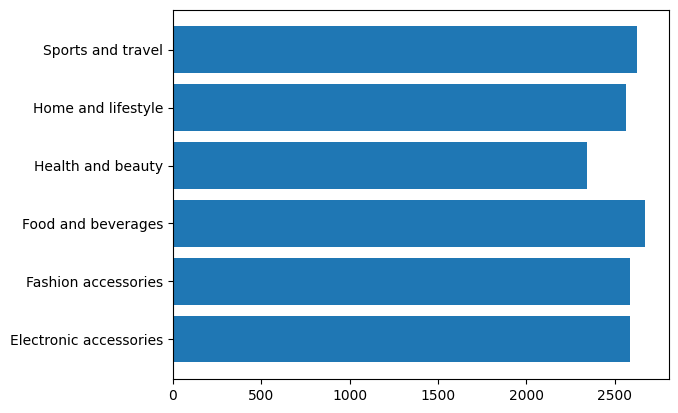

In [32]:
plt.barh(Gross_Income_By_Product.index, Gross_Income_By_Product.values)

<BarContainer object of 6 artists>

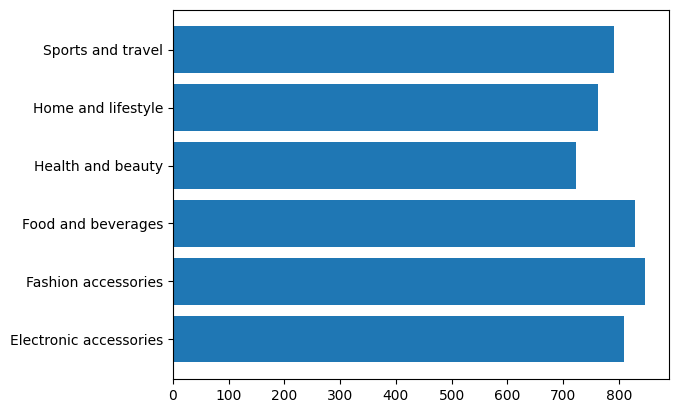

In [33]:
plt.barh(Product_Margin_By_Category.index, Product_Margin_By_Category.values)

<BarContainer object of 6 artists>

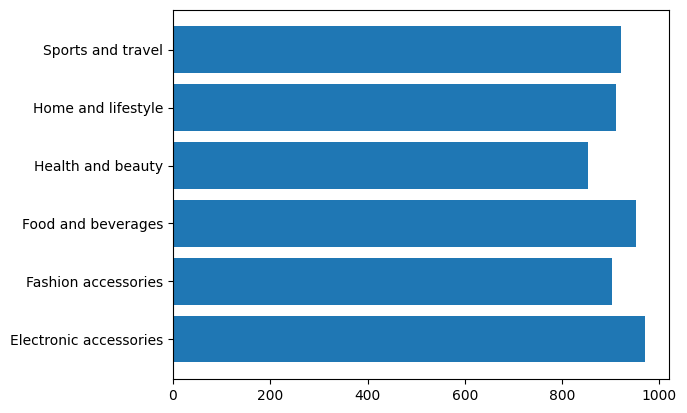

In [34]:
plt.barh(Quantity_Sold_By_Product.index, Quantity_Sold_By_Product.values)

<BarContainer object of 6 artists>

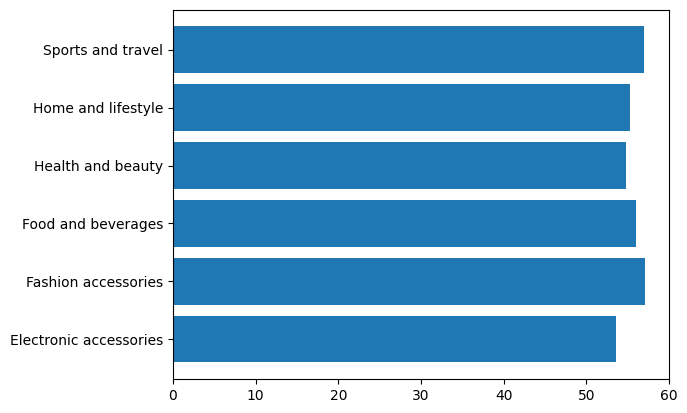

In [35]:
plt.barh(Avg_Unit_Price_Per_Proudct_Line.index, Avg_Unit_Price_Per_Proudct_Line.values)

<BarContainer object of 6 artists>

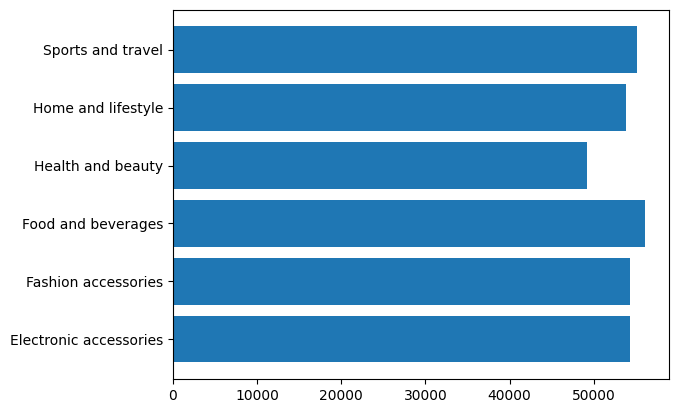

In [36]:
#sales
plt.barh(Total_Sales_by_product_line.index, Total_Sales_by_product_line.values)

([<matplotlib.patches.Wedge at 0x256911e2f90>,
 [Text(0.5073031662188678, 0.9760345780474746, 'Cash'),
  Text(-1.0997450341133321, -0.02368248177590826, 'Credit card'),
  Text(0.5281992288498047, -0.9648863014067885, 'Ewallet')],
 [Text(0.27671081793756425, 0.5323824971168043, '34.7%'),
  Text(-0.5998609276981811, -0.012917717332313594, '31.2%'),
  Text(0.2881086702817116, -0.5263016189491573, '34.1%')])

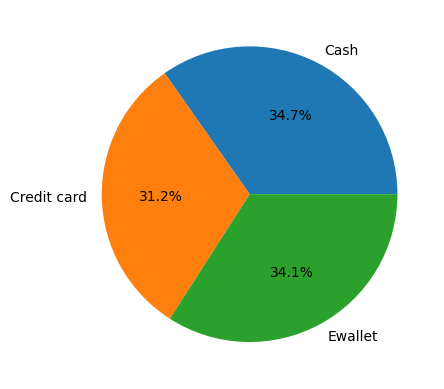

In [37]:
plt.pie(Total_Sales_by_payment_type.values,labels=Total_Sales_by_payment_type.index,autopct='%.1f%%')


([<matplotlib.patches.Wedge at 0x25690dbcb90>,
 [Text(-0.029315457816459833, 1.0996092960379207, 'Member'),
  Text(0.02931568503100375, -1.0996092899803835, 'Normal')],
 [Text(-0.015990249718068998, 0.5997868887479567, '50.8%'),
  Text(0.01599037365327477, -0.5997868854438455, '49.2%')])

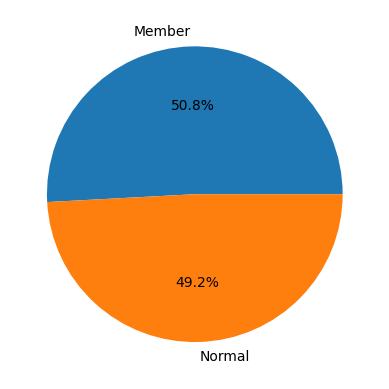

In [38]:
plt.pie(Total_Sales_by_customer_type.values,labels=Total_Sales_by_customer_type.index,autopct='%.1f%%')


([<matplotlib.patches.Wedge at 0x25690dbf890>,
 [Text(-0.003455717046476698, 1.0999945718137407, 'Member'),
  Text(0.003455550951917284, -1.0999945723355269, 'Normal')],
 [Text(-0.0018849365708054715, 0.5999970391711312, '50.1%'),
  Text(0.001884845973773064, -0.5999970394557419, '49.9%')])

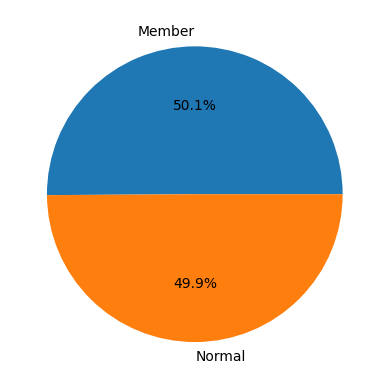

In [39]:
plt.pie(Total_Sales_by_gender.values,labels=Total_Sales_by_gender.index,autopct='%.1f%%')


In [40]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment_type,cogs,gross_margin,gross_income,rating,Month,Day,Qu_hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5,Q4
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8,Q3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,Q4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,27,Q6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,8,Q3


In [41]:
# knowlage
import numpy as np
np.corrcoef(x=df['unit_price'],y=df['tax'])

array([[1.        , 0.63396209],
       [0.63396209, 1.        ]])